In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
x_data = np.linspace(0.0, 10, 1000000)

In [6]:
noise = np.random.randn(len(x_data))

In [7]:
noise.shape

(1000000,)

y = mx + b
b = 5

In [26]:
y_true = (0.5 * x_data) + 5 + noise  # y_true is essentially the real values of y, our neural network should ideally figure out
# m and b to be 0.5 and 5 respectively

In [27]:
x_df = pd.DataFrame(data=x_data, columns=['X data'])

In [28]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [29]:
my_data = pd.concat([x_df, y_df], axis=1) # axis=1 specifies the axis along which I would like to concatenate data

In [30]:
my_data.head()

,X data,Y
0,0.00000,5.503769
1,0.00001,4.994167
2,0.00002,6.244582
3,0.00003,4.713174
4,0.00004,6.033027


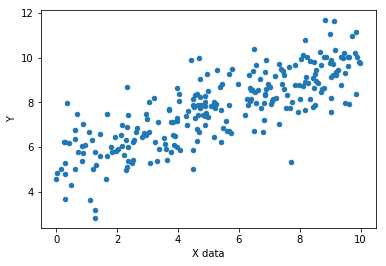

In [31]:
my_data.sample(n=250).plot(kind='scatter', x='X data', y='Y') # in order to visualize the data, we should not go for plotting the entire 
#million points because the 
# kernel might actually crash, what we should instead do is to sample the data first and plot them later

In [40]:
batch_size = 8

In [50]:
m = tf.Variable(np.random.randn(1))
b = tf.Variable(np.random.randn(1))

In [53]:
xph = tf.placeholder(tf.float64, [batch_size]) # remember we are going to feed the data in batches
yph = tf.placeholder(tf.float64, [batch_size])

In [54]:
y_model = m*xph + b

In [56]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [57]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [59]:
init = tf.global_variables_initializer()

In [60]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000 # since batch_size is 8 and we are using 1000 batches to train, we are using 8000 training examples
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m, b])
        

In [62]:
model_m

array([0.55438268])

In [63]:
model_b

array([4.88075084])

In [64]:
y_hat = x_data * model_m + model_b

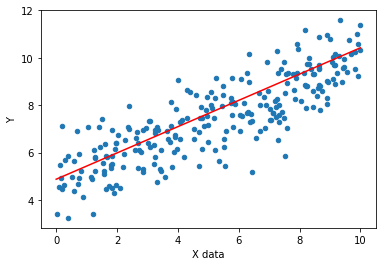

In [68]:
my_data.sample(250).plot(kind='scatter', x='X data', y='Y')
plt.plot(x_data, y_hat, 'r')